## An example of building a GillesPy2 model using Julia

In [1]:
include("./GillesPy2.jl")

Main.GillesPy2

In [2]:
m = GillesPy2.model()
k1 = GillesPy2.parameter("k1", 0.0017)
k2 = GillesPy2.parameter("k2", 0.5)
k3 = GillesPy2.parameter("k3", 0.1)
m.add_parameter([k1, k2, k3])
A = GillesPy2.species("A", 301)
B = GillesPy2.species("B", 120)
C = GillesPy2.species("C", 0)
D = GillesPy2.species("D", 0)
m.add_species([A, B, C, D])
r1 = GillesPy2.reaction("r1", Dict(A => 1, B => 1), Dict(C => 1), k1)
r2 = GillesPy2.reaction("r2", Dict(C => 1), Dict(A => 1, B => 1), k2)
r3 = GillesPy2.reaction("r3", Dict(C => 1), Dict(B => 1, D => 1), k3)
m.add_reaction([r1, r2, r3])
et = GillesPy2.event_trigger("t >= 10")
ea = GillesPy2.event_assignment("A", 301)
e = GillesPy2.event("event", et, [ea])
m.add_event([e])

1-element Array{PyCall.PyObject,1}:
 PyObject <gillespy2.core.events.Event object at 0x7f8f6da9fd68>

In [3]:
print(m.__str__())

Model

**********
Species
**********

A: 301
B: 120
C: 0
D: 0

**********
Parameters
**********

k1: 0.0017
k2: 0.5
k3: 0.1

**********
Reactions
**********

r1
	Reactants
		B: 1
		A: 1
	Products
		C: 1
	Propensity Function: k1*A*B/vol
r2
	Reactants
		C: 1
	Products
		B: 1
		A: 1
	Propensity Function: k2*C
r3
	Reactants
		C: 1
	Products
		B: 1
		D: 1
	Propensity Function: k3*C

**********
Events
**********

event
	Trigger: t >= 10
	Assignments:
		A: 301

In [4]:
result = m.run()

PyObject [{'time': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.]), 'A': array([301.        , 263.        , 248.98233353, 243.98233353,
       235.93838791, 222.04618424, 225.97321881, 221.95645996,
       224.90137298, 220.82891108, 213.82891108, 297.        ,
       281.9597928 , 275.94786184, 278.7598671 , 267.75317307,
       258.77135546, 260.69114099, 252.6911409

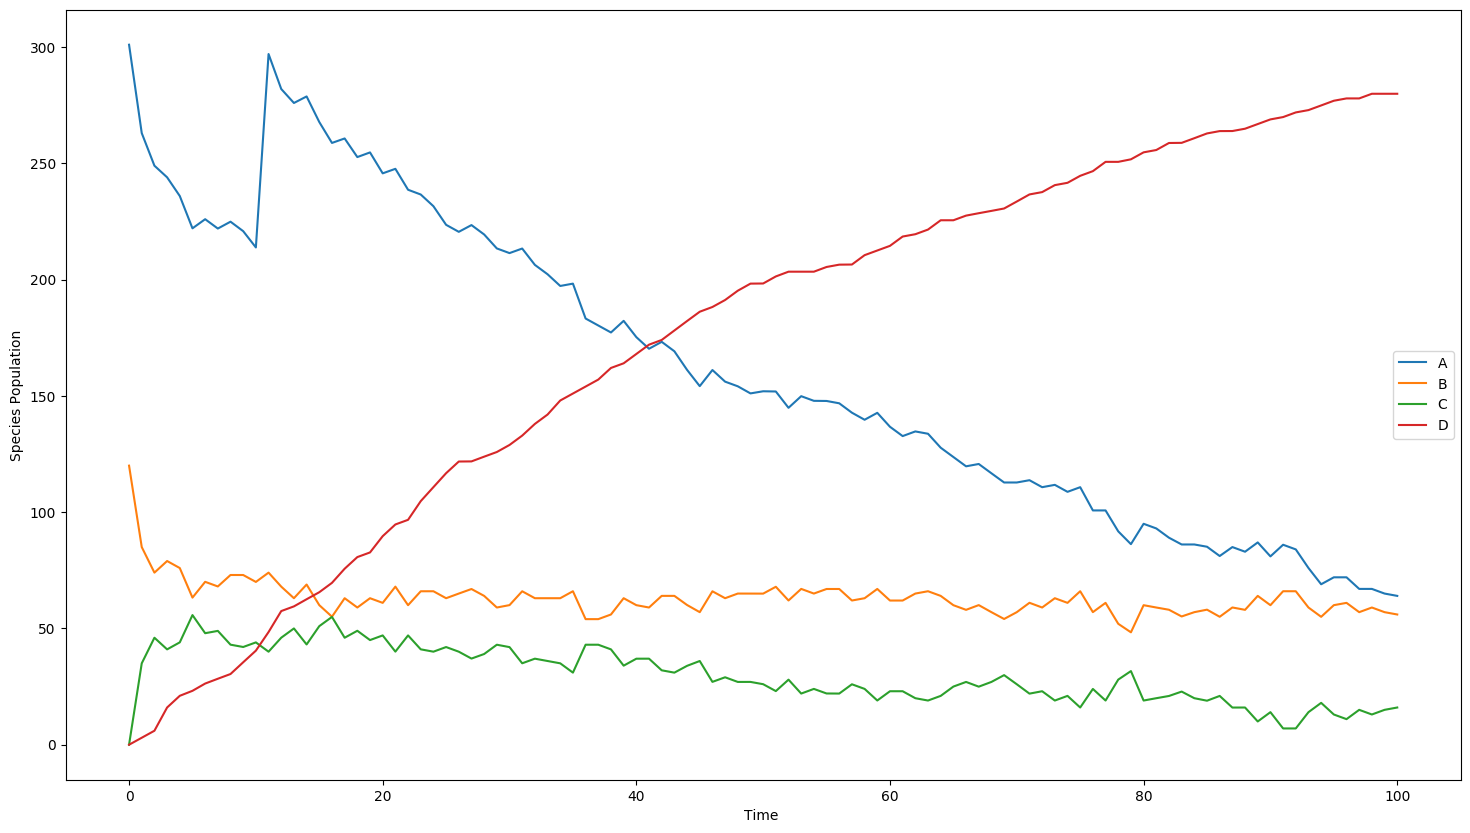

In [5]:
using PyPlot
result.plot()